# Data Exploration

In [20]:
import os

import pandas as pd
import numpy as np
from scipy.io import loadmat

import matplotlib.pyplot as plt
import seaborn as sb

In [21]:
df = pd.read_csv('data/data.csv')
df.head()

,make_id,model_id,released_year,image_name,view_point,x1,y1,x2,y2
0,1,1101,2011.0,07b90decb92ba6.jpg,1,124,33,674,480
1,1,1101,2011.0,2272c7d324cf79.jpg,4,52,153,849,506
2,1,1101,2011.0,3a62131af5fe8e.jpg,4,85,107,682,469
3,1,1101,2011.0,5133ca181b82af.jpg,2,91,23,759,551
4,1,1101,2011.0,6632ec1c2f7f87.jpg,5,58,134,707,504


In [22]:
mat = loadmat('data/misc/make_model_name.mat')
make_names = mat['make_names'].tolist()
model_names = mat['model_names'].tolist()

## Value counts

There are a total of 163 car makers and 1716 car models

In [23]:
df.groupby(['make_id', 'model_id']).size()

make_id  model_id
1        1101        18
         1102        12
         1103        28
         1104         2
         1105         7
                     ..
163      721         29
         722         68
         723         18
         724          7
         725         35
Length: 1716, dtype: int64

## Number of images for each `make_id`

In [24]:
df['make_names'] = df['make_id'].apply(lambda x: make_names[x - 1][0][0])

Text(0.5, 0, 'count')

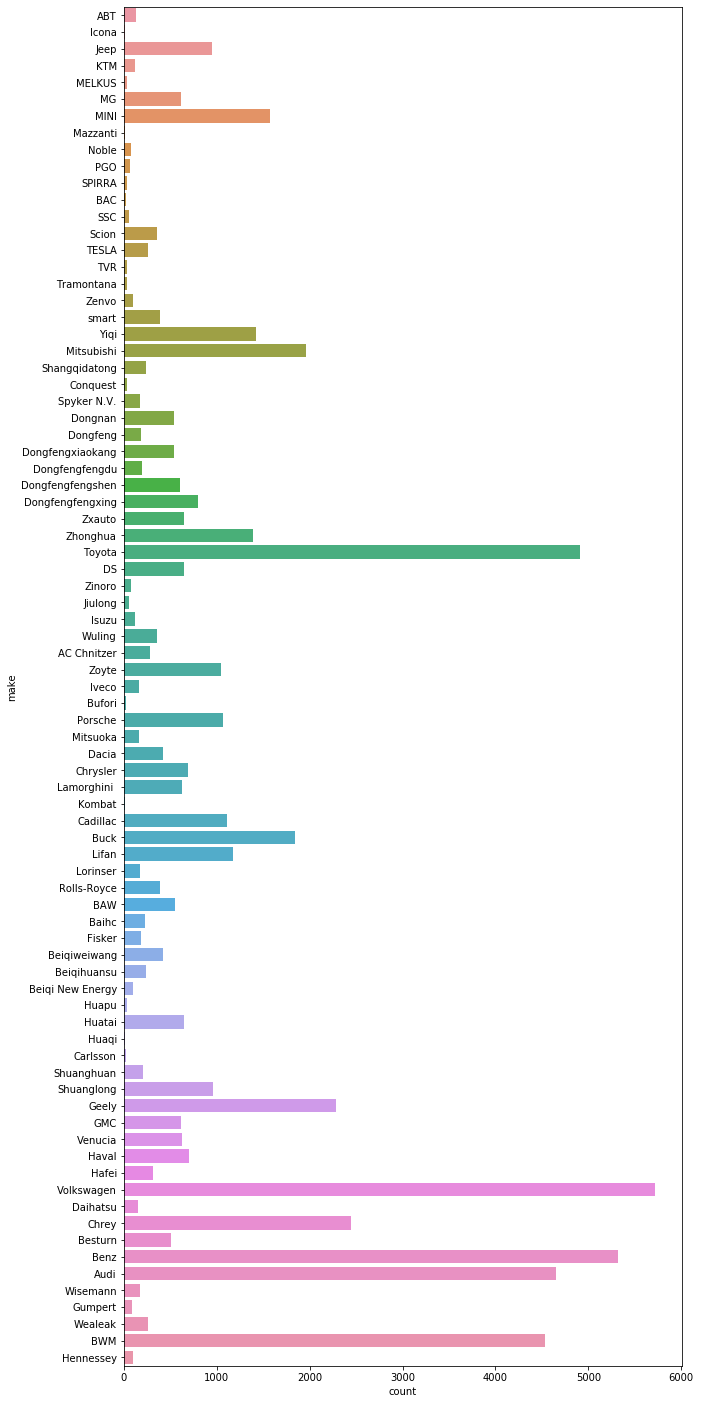

In [25]:
f, ax = plt.subplots(1, 1, figsize=(10, 25))
sb.countplot(data=df[df['make_id'] < 82], y='make_names', ax=ax)
plt.ylabel('make')
plt.xlabel('count')

Text(0.5, 0, 'count')

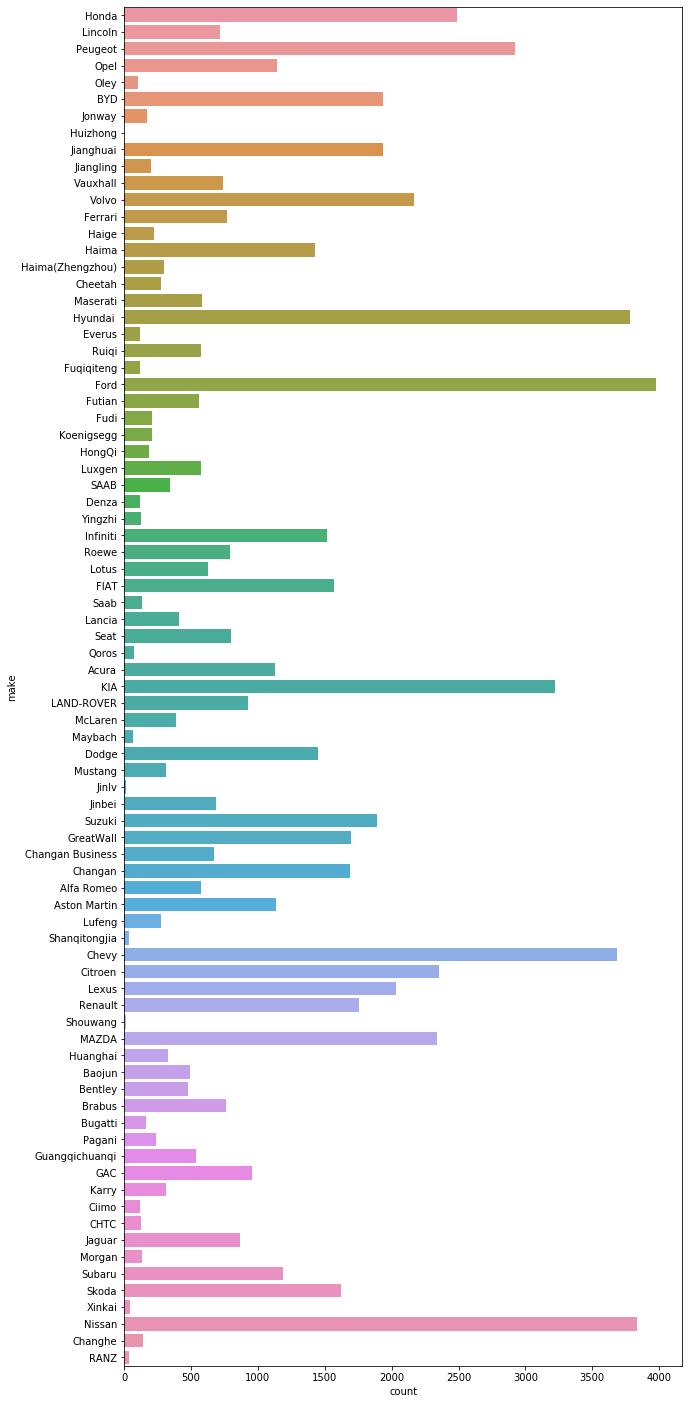

In [26]:
f, ax = plt.subplots(1, 1, figsize=(10, 25))
sb.countplot(data=df[df['make_id'] >= 82], y='make_names', ax=ax)
plt.ylabel('make')
plt.xlabel('count')

This is clearly a very imbalanced dataset.

Let us see the statistics for the number of images for each `make_id`

In [27]:
num_img = df.groupby(['make_id']).size()

In [28]:
num_img.describe()

count     163.000000
mean      838.809816
std      1119.505808
min         2.000000
25%       134.500000
50%       409.000000
75%      1060.000000
max      5720.000000
dtype: float64

The minimum number of images for each `make_id` is 2, the maximum is 5720

Let us see the `make_id` that have less than 20 images

In [29]:
num_img[num_img < 20]

make_id
10     16
16     14
52     17
65     16
107     2
147    13
161    11
dtype: int64

`make_id` 107 is the extreme case whereby there are only 2 images for this class

## Does every `make_id` have all required view points?

- -1: uncertain
- 1: front
- 2: rear
- 3: side
- 4: front_side
- 5: rear_side

In [30]:
df['view_point'].value_counts()

 4    49301
 5    31150
 3    23551
 1    18431
 2    13513
-1      780
Name: view_point, dtype: int64

In [31]:
num_vp = df.groupby(['make_id', 'view_point']).size().unstack()

In [32]:
num_vp[num_vp[[1, 2, 3, 4, 5]].isnull().any(axis=1)]

view_point,-1,1,2,3,4,5
make_id,,,,,,
16,NaN,NaN,1.0,5.0,4.0,4.0
66,NaN,1.0,NaN,2.0,12.0,5.0
107,NaN,1.0,NaN,NaN,1.0,NaN


- `make_id` 16 does not have front `view_point`
- `make_id` 66 does not have rear `view_point`
- `make_id` 107 only have front and front_side `view_point`

## Sample images for every view points

In [33]:
view_points = {
    -1: "uncertain",
    1: "front",
    2: "rear",
    3: "side",
    4: "front_side",
    5: "rear_side"
}

In [34]:
def sample_images(view_point, columns=6, rows=1):
    view_df = df[df['view_point'] == view_point].sample(n=columns * rows)
    view_df['filename'] = view_df['make_id'].astype(str) + '/' + \
                          view_df['model_id'].astype(str) + '/' + \
                          view_df['released_year'].apply(lambda x: str(int(x)) if not np.isnan(x) else 'unknown') + '/' + \
                          view_df['image_name']
    fig = plt.figure(figsize=(columns * 5, rows * 5))
    for i, filename in enumerate(view_df['filename'], start=1):
        img = plt.imread('data/image/' + filename)
        fig.add_subplot(rows, columns, i)
        plt.title(view_points[view_point], fontsize=30)
        plt.imshow(img)
        plt.axis("off")

### Front View

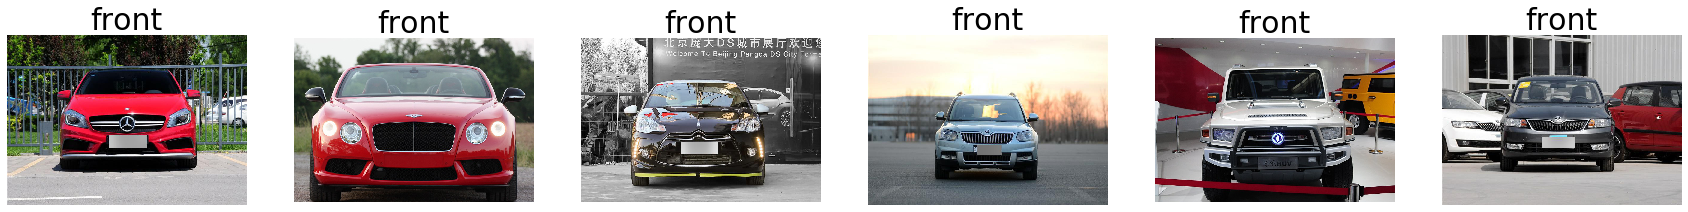

In [35]:
sample_images(1)

### Rear View

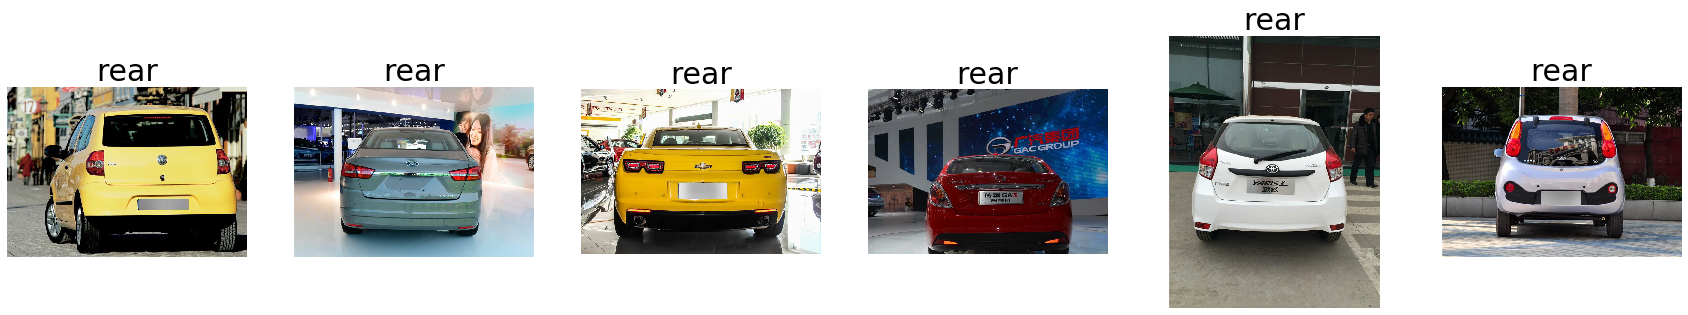

In [36]:
sample_images(2)

### Side View

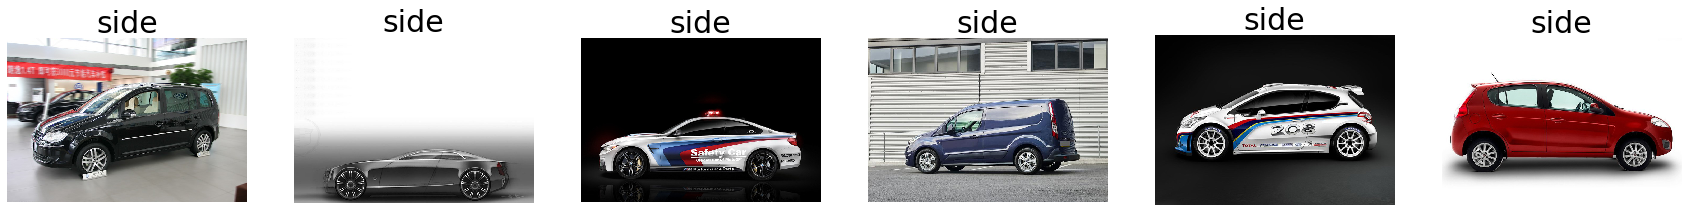

In [37]:
sample_images(3)

### Front Side View

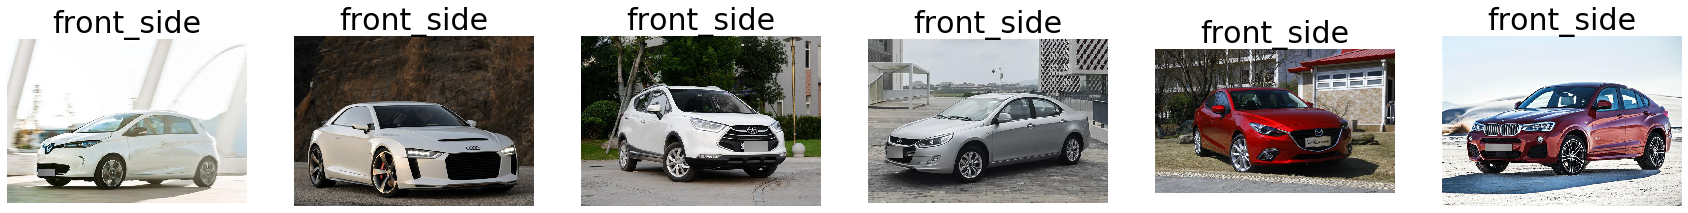

In [38]:
sample_images(4)

### Rear Side View

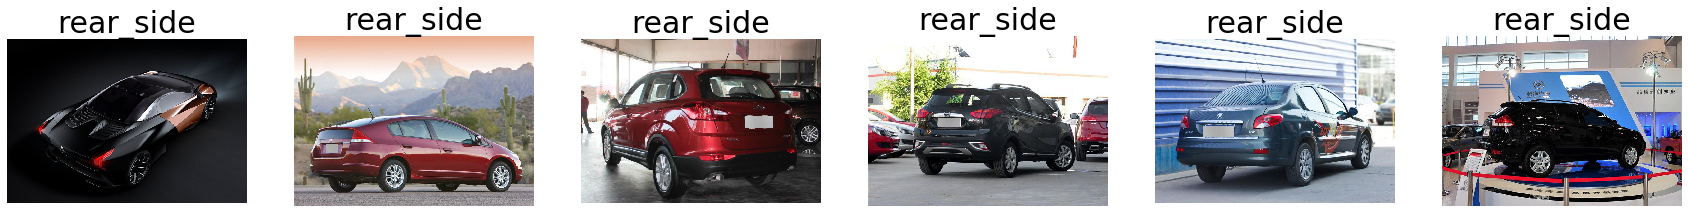

In [39]:
sample_images(5)

### Uncertain

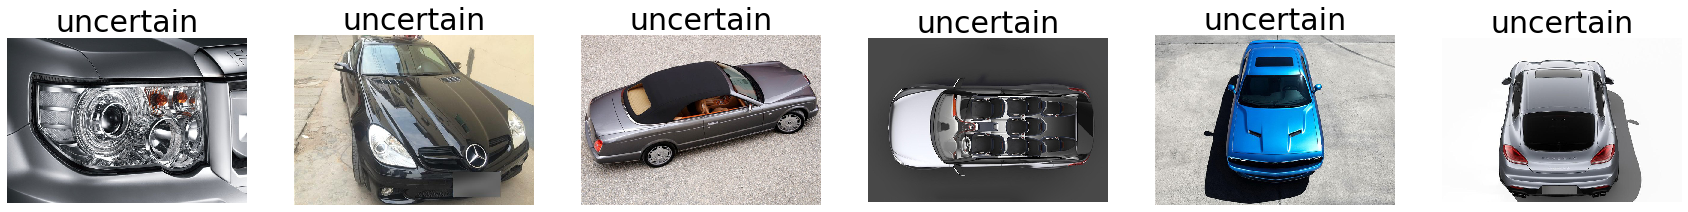

In [40]:
sample_images(-1)